<div class="alert alert-block alert-info">
    <b> More Complex Viz Manipulation </b><br>
- So far, we have walked through the fundamentals of matplotlib objects and a non exhaustive set of basic data viz archetypes. <br>
- Now, we'll show techniques for manipulating our fundamental viz templates to create some more complex data viz and data viz systems, from the use of subplots to making our own dumbbell plots from scratch. <br>
- We'll call on some real world datasets, but we'll also use mock data in some examples, for simplicity's sake.
    
</div>

# 0. Prepare Notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import numpy as np
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

### Import Data Step
- airlines_sample: A dataset that contains domestic passengers count by year and month for major airlines since 2005 (source: https://www.transtats.bts.gov/DL_SelectFields.asp)
- pels_lineup_sample_201920: A sample of lineup data that shows the total scoring and possessions played by each 5 man lineup for the New Orleans Pelicans a little ways into the 2019-20 NBA Season (source: NBA Stats Lineup Data)

In [3]:
airlines = pd.read_csv('sample_data/airlines_sample.csv')
airlines['DATE_JOIN'] = pd.to_datetime(airlines['DATE_JOIN'])
airlines.head()

,UNIQUE_CARRIER_NAME,YEAR,MONTH,DAY,DATE_JOIN,PASSENGERS
0,Alaska Airlines Inc.,2005,1,1,2005-01-01,1045007
1,Alaska Airlines Inc.,2005,2,1,2005-02-01,1000146
2,Alaska Airlines Inc.,2005,3,1,2005-03-01,1236977
3,Alaska Airlines Inc.,2005,4,1,2005-04-01,1171204
4,Alaska Airlines Inc.,2005,5,1,2005-05-01,1191795


In [4]:
lineups = pd.read_csv('sample_data/pels_lineups_sample_201920.csv')
lineups.head()

,P1,P2,P3,P4,P5,Poss,PTS
0,D. Favors,J. Holiday,B. Ingram,J. Redick,K. Williams,38,5
1,D. Favors,J. Hart,J. Holiday,J. Redick,K. Williams,28,1
2,L. Ball,J. Holiday,B. Ingram,N. Melli,J. Okafor,24,11
3,D. Favors,J. Holiday,F. Jackson,J. Redick,K. Williams,22,10
4,N. Alexander-Walker,J. Hart,F. Jackson,N. Melli,K. Williams,21,10


# 1. How do we create a modular grid of graphs?

## A) Let's first start with fundamental subplots

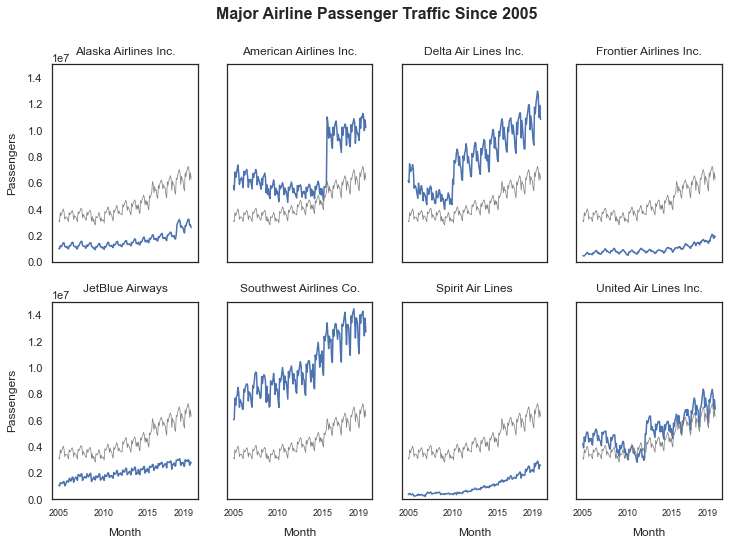

In [16]:
# Subplots are really simple, and we've actually seen them initialized before (though we never took full advantage)
# Matplotlib subplots just create an evenly sized and spaced grid. Let's try it out using our airline data.
# We'll plot our carrier traffic over time individually for each airline, we'll also do an average reference line.

# Start by creating an average line of airline passenger traffic over time
avg_line = airlines.groupby(['DATE_JOIN'], sort=False).agg({'PASSENGERS': 'mean'}).reset_index()

# Time to initialize our figure; we're gonna initialize it with 8 axes as a 2x4 plot (rows x columns)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 4, 1)
ax2 = fig.add_subplot(2, 4, 2)
ax3 = fig.add_subplot(2, 4, 3)
ax4 = fig.add_subplot(2, 4, 4)
ax5 = fig.add_subplot(2, 4, 5)
ax6 = fig.add_subplot(2, 4, 6)
ax7 = fig.add_subplot(2, 4, 7)
ax8 = fig.add_subplot(2, 4, 8)
axes_arr = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# Let's iterate through the 8 axes and plot one of our airlines on each one
# We'll be plotting in the same way that we've done numerous times
air_unique = airlines['UNIQUE_CARRIER_NAME'].unique()
for ax in axes_arr:
    ind = axes_arr.index(ax)
    # Plot our main line
    ax.plot(airlines[airlines['UNIQUE_CARRIER_NAME'] == air_unique[ind]]['DATE_JOIN'], 
            airlines[airlines['UNIQUE_CARRIER_NAME'] == air_unique[ind]]['PASSENGERS'])
    
    # Plot our reference line
    ax.plot(avg_line['DATE_JOIN'], avg_line['PASSENGERS'], color='gray', linewidth=0.75)
    
    # Format each axes so that our grid will look clean and professional
    # We can also pad our labels such as our title to increase the space around it so things don't feel cramped. 
    # The padding for the title is controlled by the 'pad' parameter
    ax.set_title(air_unique[ind], pad=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # For consistency's sake, let's standardize the y-axes limits
    ax.set_ylim(0, 15000000)
    
    # We'll only show the x-axis on the four plots on the bottom of our grid, y-axis only on the two left most plots
    if ind%4 != 0:
        ax.yaxis.set_ticks([])
    if ind%4 == 0:
        # Padding for axis labels is controlled by the 'labelpad' parameter
        ax.set_ylabel('Passengers', labelpad=10)
    if ind <= 3:   
        ax.xaxis.set_ticks([])
    if ind >= 4:
        ax.xaxis.set_ticks(['2005-01-01', '2010-01-01', '2015-01-01', '2019-01-01'])
        ax.xaxis.set_ticklabels([2005, 2010, 2015, 2019], fontsize=9)
        ax.set_xlabel('Month', labelpad=10)

# Wrap it up with a bow
plt.suptitle('Major Airline Passenger Traffic Since 2005', fontsize=16, fontweight='heavy')
plt.show()

## B) More complex subplot manipulation is possible with GridSpec

### We'll show two examples; the first is a very simple custom grid similar to the above (Reference Line, Southwest, American Airlines, Delta Airlines)

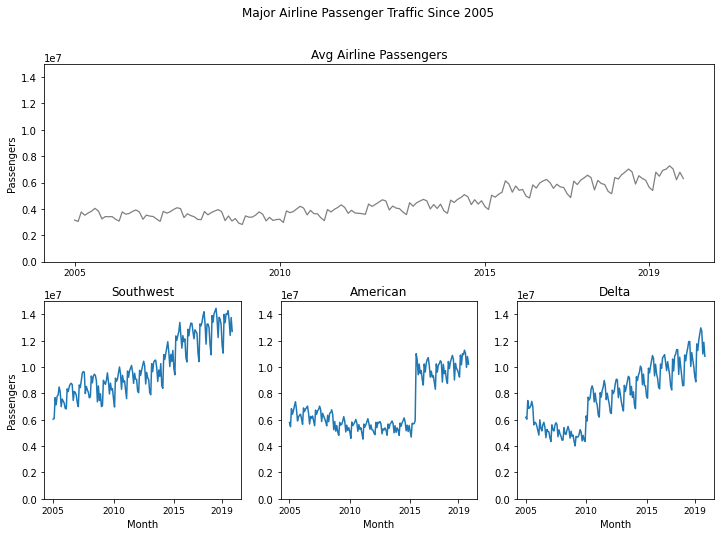

In [6]:
fig = plt.figure(figsize=(12, 8))

# We initiate the GridSpec as in a 2x3 array (there are 6 navigable grid elements)
gs = plt.GridSpec(2, 3, figure=fig)

# We will use the top row all the way across for the reference line
# '0' indicates that it's the first row, and ':' indicates that it will span all available columns
# Arranging a GridSpec is just like manipulating arrays
ax1 = plt.subplot(gs[0, :])

# On the second row ('1'), we'll split out three graphs for three specific airlines 
# (remember that we initialized the GridSpec with 3 navigable columns)
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[1, 2])

# Now, once our axes are set up, everything else is just as we've done before
ax1.plot(avg_line['DATE_JOIN'], avg_line['PASSENGERS'], color='gray', linewidth=1.25)
ax2.plot(airlines[airlines['UNIQUE_CARRIER_NAME'] == 'Southwest Airlines Co.']['DATE_JOIN'], 
         airlines[airlines['UNIQUE_CARRIER_NAME'] == 'Southwest Airlines Co.']['PASSENGERS'])
ax3.plot(airlines[airlines['UNIQUE_CARRIER_NAME'] == 'American Airlines Inc.']['DATE_JOIN'], 
         airlines[airlines['UNIQUE_CARRIER_NAME'] == 'American Airlines Inc.']['PASSENGERS'])
ax4.plot(airlines[airlines['UNIQUE_CARRIER_NAME'] == 'Delta Air Lines Inc.']['DATE_JOIN'], 
         airlines[airlines['UNIQUE_CARRIER_NAME'] == 'Delta Air Lines Inc.']['PASSENGERS'])

# Formatting axes
ax1.xaxis.set_ticks(['2005-01-01', '2010-01-01', '2015-01-01', '2019-01-01'])
ax1.xaxis.set_ticklabels([2005, 2010, 2015, 2019], fontsize=9)
ax1.set_ylim(0, 15000000)
ax1.set_ylabel('Passengers')
ax1.set_title('Avg Airline Passengers')

ax2.xaxis.set_ticks(['2005-01-01', '2010-01-01', '2015-01-01', '2019-01-01'])
ax2.xaxis.set_ticklabels([2005, 2010, 2015, 2019], fontsize=9)
ax2.set_ylim(0, 15000000)
ax2.set_ylabel('Passengers')
ax2.set_xlabel('Month')
ax2.set_title('Southwest')

ax3.xaxis.set_ticks(['2005-01-01', '2010-01-01', '2015-01-01', '2019-01-01'])
ax3.xaxis.set_ticklabels([2005, 2010, 2015, 2019], fontsize=9)
ax3.set_ylim(0, 15000000)
ax3.set_xlabel('Month')
ax3.set_title('American')

ax4.xaxis.set_ticks(['2005-01-01', '2010-01-01', '2015-01-01', '2019-01-01'])
ax4.xaxis.set_ticklabels([2005, 2010, 2015, 2019], fontsize=9)
ax4.set_ylim(0, 15000000)
ax4.set_xlabel('Month')
ax4.set_title('Delta')

plt.suptitle('Major Airline Passenger Traffic Since 2005')
plt.show()

### The second example shows how to make a complex viz object. Remember our heatmap of airline traffic? We'll add marginal distributions to the sides.

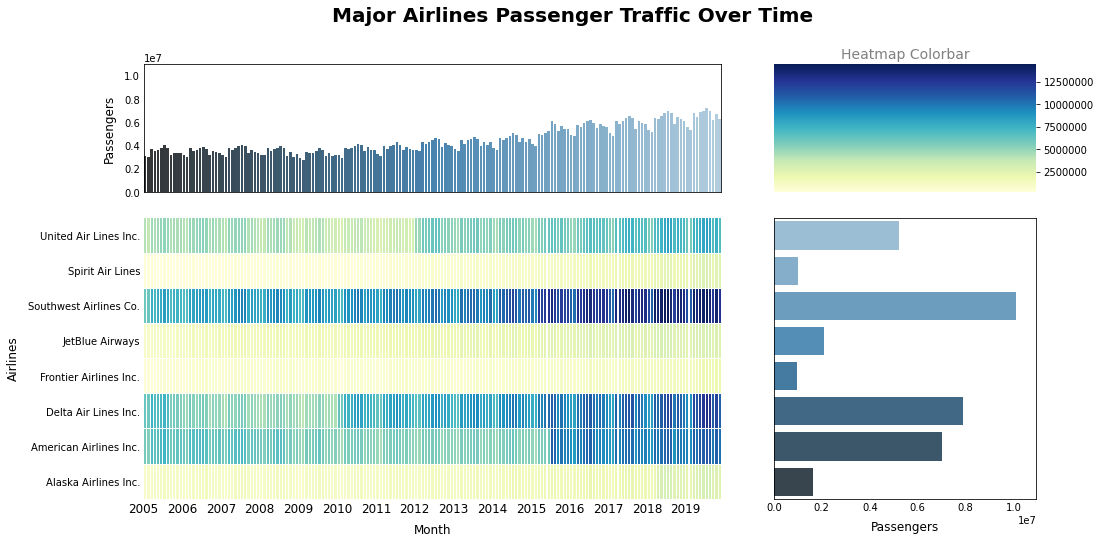

In [7]:
# In order to use the seaborn heatmap, we must convert the dataframe first into a pivot table object
airlines_pv = airlines.pivot('UNIQUE_CARRIER_NAME', 'DATE_JOIN', 'PASSENGERS')

# Now with that out of the way, let's start with the viz
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Major Airlines Passenger Traffic Over Time \n', fontsize=20, fontweight='heavy')

# Initialize a 3 x 3 Grid Spec
gs = plt.GridSpec(3, 3, figure=fig)

ax1 = plt.subplot(gs[1:, :-1])
ax2 = plt.subplot(gs[1:, -1])
ax3 = plt.subplot(gs[0, :-1])
ax4 = plt.subplot(gs[0, -1])

# This is the colorbar formatter like we saw in Part 2, so that we can turn off scientific notation
formatter = tkr.ScalarFormatter()
formatter.set_scientific(False)

# On our first, main axis, create our heatmap, specified on ax1, and the colorbar specified on ax4
ax1 = sns.heatmap(airlines_pv, linewidths=.02, ax=ax1, cmap="YlGnBu", cbar_ax=ax4, cbar_kws={'format': formatter})

# Turns out there's a bug in the newest versions of Matplotlib and Seaborn that causes the first and last row
# of the heatmap to be cut in half, so we'll need to manually set the y-limits based on how many rows we have
ax1.set_ylim(0, 8)

# Turn off ticks, and set custom ticks on our x-axis for the dates (like we saw in Part 2)
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_xticks(np.arange(0, len(airlines[airlines['UNIQUE_CARRIER_NAME'] == 'Southwest Airlines Co.']), 12))
ax1.set_xticklabels(list(airlines['YEAR'].unique()), rotation=0, fontsize=12, fontweight='light')

# Set the Labels for our primary heatmap
ax1.set_ylabel('Airlines', labelpad=8, fontsize=12)
ax1.set_xlabel('Month', labelpad=8, fontsize=12)

# On ax2 (the right side axis), we'll do a vertical barplot that shows the sum total of passengers by carrier
# This will illustrate our market leaders
ax2 = sns.barplot(y="UNIQUE_CARRIER_NAME", x="PASSENGERS", data=airlines, 
                  orient='h', errwidth=0, ax=ax2, palette='Blues_d')

# Format the vertical barplot
# Because of the way the vertical bar plot gets flipped, we'll need to invert the y-axis to align with heatmap
ax2.invert_yaxis()
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.set_xlabel('Passengers', labelpad=8, fontsize=12)

# On ax3 (the top axis), we'll do a horizontal barplot that shows the sum total of passengers by date
# This will illustrate the seasonality and overall increase in airline traffic
ax3 = sns.barplot(x="DATE_JOIN", y="PASSENGERS", data=airlines, 
                  orient='v', errwidth=0, ax=ax3, palette='Blues_d')

# Format the horizontal barplot
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax3.set_xticklabels([])
ax3.set_xlabel('')
ax3.set_ylabel('Passengers', labelpad=8, fontsize=12)

# Remember, we put our colorbar onto ax4. Let's just slap a title on it.
ax4.set_title('Heatmap Colorbar', fontsize=14, color='gray')

plt.show()

# 2. Remember our ridge plots from Part 2? Let's dive into them further.

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:382: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small

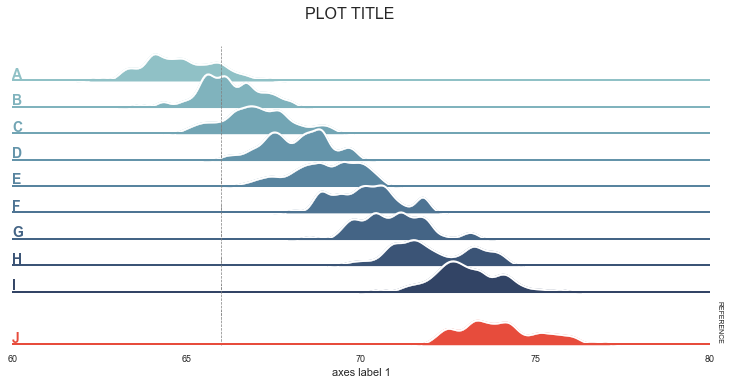

In [8]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Let's start by creating the synthetic dataset in the Seaborn Ridge Plot example
rs = np.random.RandomState(1979)

# The original example had 10 elements. We want to create a blank template so that we can 
# add empty space between the last and second to last plot. 
# Since that's 11 classes with 50 randomized elements in each, overall array will be 550 elements.
x = rs.randn(550)
g = np.tile(list("ABCDEFGHI J"), 50)

df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Let's ensure that there's nulls in the array for the blank category in the second to last spot.
# This will give us an empty/null graph space.
df["x"] = np.where(df['g'] == ' ', np.NaN, df['x'])

# Initialize color palette with 11 elements
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)

# MODIFYING THE COLOR PALETTE - Second to last object should be white since it'll be empty space, 
# and the last one, our hypothetical "reference" KDE plot at the bottom, will be red to set it apart
pal[9] = 'white' # White
pal[10] = "#e74c3c" # Red color

# Initialize the FacetGrid object
# SEABORN FACET GRID CREATES ITS OWN FIGURE
# ASPECT AND HEIGHT CONTROL SIZE OF THE FIGURE
# ROW AND HUE ARE TAKEN FROM THE SOURCE DATAFRAME
# SETTING SHAREX TO FALSE ALLOWS US TO INDIVIDUALLY CONTROL THE X-AXES ON EACH FACET
g = sns.FacetGrid(df, row="g", hue="g", aspect=25, height=0.5, palette=pal, sharex=False)

# Draw the densities in a few steps, like we've done before
# The map function allows us to essentially apply one common graph template onto our entire facet grid
# Again, reminder that 'bw' controls the bandwidth, or granularity, of our KDE curves
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)

# DRAW A GENERALIZED VERTICAL LINE ACROSS WHOLE FIGURE - A HYPOTHETICAL REFERENCE LINE
g.map(plt.axvline, x=66, lw=0.7, linestyle='--', color='gray', clip_on=False)

# Set the subplots to slightly overlap; this will create our ridge effect
g.fig.subplots_adjust(hspace=-.25)

# Define and use a simple function to label the plot in axes coordinates, like we've seen before
def label(x, color, label):
    ax = plt.gca()
    # ha = Horizontal Alignment; va = Vertical Alignment
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", 
            va="center", transform=ax.transAxes, fontsize=14)

g.map(label, "x")

# NOW MANIPULATE INDIVIDUAL FACETS SEPARATELY, SO THAT WE CAN FORMAT THEM
for i in range(11):
    # Set the X Axis Limits, turn off ticks, and turn off individual facet titles globally
    g.axes[i, 0].set_xlim(60, 80)
    g.axes[i, 0].set_yticks([])
    g.axes[i, 0].set_title("")
    
    # On our last reference plot, we're gonna make the horizontal "horizon" line red
    # Set up the ticks in increments of 5 and format it like we've done with other plots many times before
    # Format and move our y-axis label to the right side to denote our reference plot
    if i == 10:
        g.axes[i, 0].axhline(y=0, lw=4, color=pal[i])
        g.axes[i, 0].set_xticks([60, 65, 70, 75, 80])
        g.axes[i, 0].set_xticklabels([60, 65, 70, 75, 80], fontsize=9)
        g.axes[i, 0].set_xlabel('axes label 1', fontsize=11)
        g.axes[i, 0].set_ylabel('REFERENCE', fontsize=7, rotation=270)
        g.axes[i, 0].get_yaxis().set_label_coords(1.01, 0.65)

    # For all other facets, turn off other labels and ticks, and color them with our palette from earlier
    else:
        g.axes[i, 0].axhline(y=0, lw=4, color=pal[i])
        g.axes[i, 0].set_xlabel('')
        g.axes[i, 0].set_xticks([])

# Turn off spines on the left and bottom
g.despine(bottom=True, left=True)

# Set a title for the overall figure
plt.suptitle("PLOT TITLE", fontsize=16)

plt.show()

# 3. Dumbbell plots can highlight trend changes between key markers.

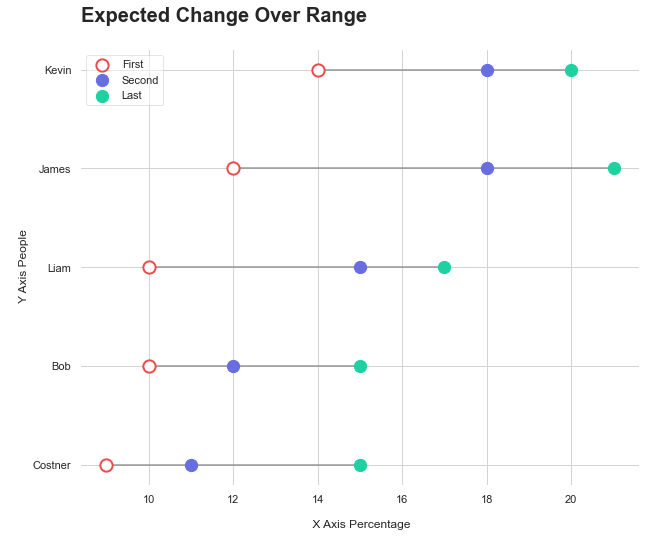

In [9]:
# We'll create a synthetic dataset and sort it by the values in the final group... 
# Let's pretend it shows the goals scored by 5 different players from Season 1 to 2 to 3
data = {'Group': ['Bob', 'Kevin', 'James', 'Costner', 'Liam'],
        'First': [10, 14, 12, 9, 10],
        'Second': [12, 18, 18, 11, 15],
        'Last': [15, 20, 21, 15, 17]}

df = pd.DataFrame(data)
df = df.sort_values(by='First', ascending=True)

# First, initialize the figure like we've seen many times over by now
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

# We're gonna start by creating the lines between our endpoints for each player (this is the "bar" in the dumbbell)
# range(1, 6) is used to initialize 5 lines
# xmin and xmax are the specified endpoints for each line
# zorder specifies the front to back order of our graph objects (smaller = farther back)
plt.hlines(y=range(1, 6), xmin=df['First'], xmax=df['Second'], color='grey', alpha=0.6, linewidth=2, zorder=1)
plt.hlines(y=range(1, 6), xmin=df['Second'], xmax=df['Last'], color='grey', alpha=0.6, linewidth=2, zorder=1)

# Like we've done with scatter plots, plot each datapoint, but the y-value is simply the line for each player
# If we want to specify the face color and edge color of our points, we can split it out. Otherwise just use 'color.'
# 's' sets the size of our points
plt.scatter(df['First'], range(1, 6), facecolor='white', linewidth=2, edgecolor='#eb4d4b',
            alpha=1.0, s=150, label='First', zorder=2)
plt.scatter(df['Second'], range(1, 6), color='#686de0', alpha=1.0, s=150, label='Second', zorder=2)
plt.scatter(df['Last'], range(1, 6), color='#1dd1a1', alpha=1.0, s=150, label='Last', zorder=2)

# We're gonna turn off all the spines on our graph, as it'll be purely grid based
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Create our grid for the dumbbell plot and set it all the way in the back ('-' just denotes a solid line)
ax.grid(linestyle='-', color='#D3D3D3', zorder=0)

# Turn off all ticks on the axis (reasonable, considering we don't even have spines any more)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Label the Y-axis with our player names
plt.yticks(range(1, 6), df['Group'])

# Just a few other touch-ups
plt.title("Expected Change Over Range \n", loc='left', fontweight='heavy', fontsize=20)
plt.xlabel('\n X Axis Percentage')
plt.ylabel('\n Y Axis People')

# Styling legend
plt.legend(framealpha=0.5, facecolor='white')

plt.show()

# 4. A waterfall chart can break out a change between two endpoints.

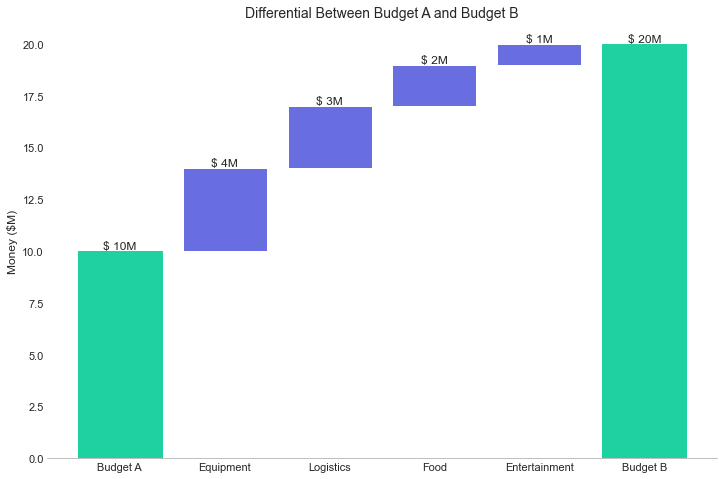

In [10]:
# In order to create our waterfall plot, we're going to utilize a technique very similar to our stacked bar graphs
# First we need a dataset that is formatted with three columns: a category label, a raw bar size, and a bottom size
# The raw bar size is just the actual composition of the individual bars
# The bottom bar size (which will elevate the raw bars) needs to be a running cumulative sum. However, 
# in this column, make sure the first and last element (endpoints of our waterfall) are 0, as they won't be elevated
# Take a look at the below sample:
wf_data = {'categories': ['Budget A', 'Equipment', 'Logistics', 'Food', 'Entertainment', 'Budget B'],
           'sum': [10, 4, 3, 2, 1, 20],
           'cumsum': [0, 10, 14, 17, 19, 0]}

wf_df = pd.DataFrame(wf_data)

# Initialize figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

# Create matplotlib bar plot, with the columns denoted from our synthetic dataset above. Set all to a common color
wf = ax.bar(wf_df.index, wf_df['sum'], bottom = wf_df['cumsum'], color = '#686de0')

# Set endpoint bars to distinct colors
wf[0].set_color('#1dd1a1')
wf[-1].set_color('#1dd1a1')

# Set labels to annotate each of the bars
for rect in wf:
    height = wf_df['cumsum'][wf.index(rect)] + wf_df['sum'][wf.index(rect)]
    ax.text(rect.get_x() + rect.get_width()/2., height, "$ "+ str(round(wf_df['sum'][wf.index(rect)], 2)) + "M", 
            ha='center', va='bottom')

# Format and clean up spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(0.5)

# Format Axis ticks and set x-axis tick labels
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_xticks(range(len(wf_df['categories'].unique())))
ax.set_xticklabels(wf_df['categories'].unique(), rotation=0, fontsize=11)
ax.set_ylabel('Money ($M)')

# Snap your fingers, plot done!
plt.title('Differential Between Budget A and Budget B', fontsize=14)
plt.show()

# 5. An Overlapping Sets plot lets us represent complex multi-node combos.

### We're going to take a sample of NBA lineup data and plot the performance of each lineup. There is a bit more complex data setup involved here, so first let's start by setting up our lineup data.

In [11]:
# Start by taking our lineups dataframe and turning it into a dictionary that will be the basis for 
# a binary sparse version of the dataframe. For each row in our dataframe, just encore a dictionary entry
# with a 1 assigned to each player in that row. 
lineup_dicts = []
for x in lineups[lineups['Poss'] >= 10].values:
    # There appears to be some weird UTF-8 encoding characters, so we're just gonna use regex to strip them out.
    lineup_dicts.append({str(x[0]).replace('\xa0', ''): 1, str(x[1]).replace('\xa0', ''): 1,
                         str(x[2]).replace('\xa0', ''): 1, str(x[3]).replace('\xa0', ''): 1,
                         str(x[4]).replace('\xa0', ''): 1})

# The DictVectorizer method from SciKit Learn will help us turn that dictionary with 1's assigned to each player
# into a data set where all players are columns and then represented by 1's and 0's for if they're part of the lineup.
v = DictVectorizer(sparse=False)
X = v.fit_transform(lineup_dicts)

names = v.get_feature_names()

# Turn the DictVectorizer output into a dataframe
lineup_df_all = pd.DataFrame(X, columns=names)

# Add back in the possessions and plus-minus column into our dataframe 
# (we shouldn't have changed the order of any of the data so this should still hold)
lineup_df_all['Possessions'] = lineups['Poss']
lineup_df_all['PlusMinus'] = lineups['PTS']

# Re-index the columns by players who've been in the most lineups and the rows by lineups with the most possessions
lineup_df_all = lineup_df_all.reindex(columns=lineup_df_all.sum().sort_values(ascending=True).index)
lineup_df_all = lineup_df_all.sort_values(by='Possessions', ascending=False)

lineup_df_all.head()

,D. Favors,E. Moore,J. Okafor,J. Hayes,N. Melli,L. Ball,J. Holiday,J. Redick,N. Alexander-Walker,B. Ingram,F. Jackson,J. Hart,K. Williams,PlusMinus,Possessions
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5,38
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,28
2,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,11,24
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,10,22
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,10,21


### Now let's turn our sparse dataframe into an array of combinatorial nodes that will guide our plotting.

In [12]:
# Let's preserve our player names...
names = list(lineup_df_all.columns)[:-2]

# ...because we're going to now convert all the column names into numerical indices
lineup_df_all.columns = [i for i in range(0, len(names))] + ['PlusMinus', 'Possessions']

# Get an array of indices showing True wherever there are 1's in our transposed array 
# We're transposing because our players are actually gonna be the y-axis on our main combination sets plot
idx = lineup_df_all.T.apply(lambda x: x==1)

# In that transposed version of our dataframe, iterate through each column (which will now be each lineup combo)
# and find the indices that are 1's. Essentially, find the appropriate indices for each player in the lineup.
col_idx = []
for i in range(lineup_df_all.T.shape[1]):
    # The offset of [:-2] here is so that we don't look at our plus-minus or possessions columns and only at players
    col_idx.append(lineup_df_all.T[:-2].iloc[:,i][idx[:-2].iloc[:,i]].index.tolist())

# Now we just need to turn that set of indices representing each lineup into 2D points that we can plot.
# We'll iterate through the array of indices and turn it into a list of tuples for each of the indices.
# The x-value will be the index value (identifying the player) and the y-value will be the column value (lineup)
nodes_arr = []
c = 0
for i in col_idx:
    temp = []
    for j in range(len(i)):
        temp.append((i[j], c))

    c += 1
    if len(temp) != 0:
        nodes_arr.append(temp)

# Now we've got a list holding the coordinates of each combination set that we will plot
print (nodes_arr)

[[(0, 0), (6, 0), (7, 0), (9, 0), (12, 0)], [(0, 1), (6, 1), (7, 1), (11, 1), (12, 1)], [(2, 2), (4, 2), (5, 2), (6, 2), (9, 2)], [(0, 3), (6, 3), (7, 3), (10, 3), (12, 3)], [(4, 4), (8, 4), (10, 4), (11, 4), (12, 4)], [(5, 5), (7, 5), (9, 5), (11, 5), (12, 5)], [(2, 6), (8, 6), (9, 6), (10, 6), (12, 6)], [(3, 7), (5, 7), (8, 7), (10, 7), (12, 7)], [(0, 8), (1, 8), (6, 8), (7, 8), (11, 8)], [(2, 9), (5, 9), (6, 9), (9, 9), (10, 9)], [(3, 10), (7, 10), (8, 10), (10, 10), (11, 10)], [(1, 11), (2, 11), (8, 11), (11, 11), (12, 11)], [(1, 12), (3, 12), (7, 12), (10, 12), (11, 12)], [(1, 13), (3, 13), (8, 13), (10, 13), (12, 13)], [(0, 14), (1, 14), (4, 14), (6, 14), (8, 14)], [(2, 15), (5, 15), (6, 15), (11, 15), (12, 15)], [(3, 16), (8, 16), (9, 16), (10, 16), (11, 16)], [(4, 17), (6, 17), (7, 17), (9, 17), (11, 17)], [(4, 18), (5, 18), (9, 18), (11, 18), (12, 18)], [(3, 19), (5, 19), (7, 19), (9, 19), (11, 19)], [(4, 20), (8, 20), (9, 20), (10, 20), (12, 20)]]


### Now we're finally ready to plot our overlapping sets...

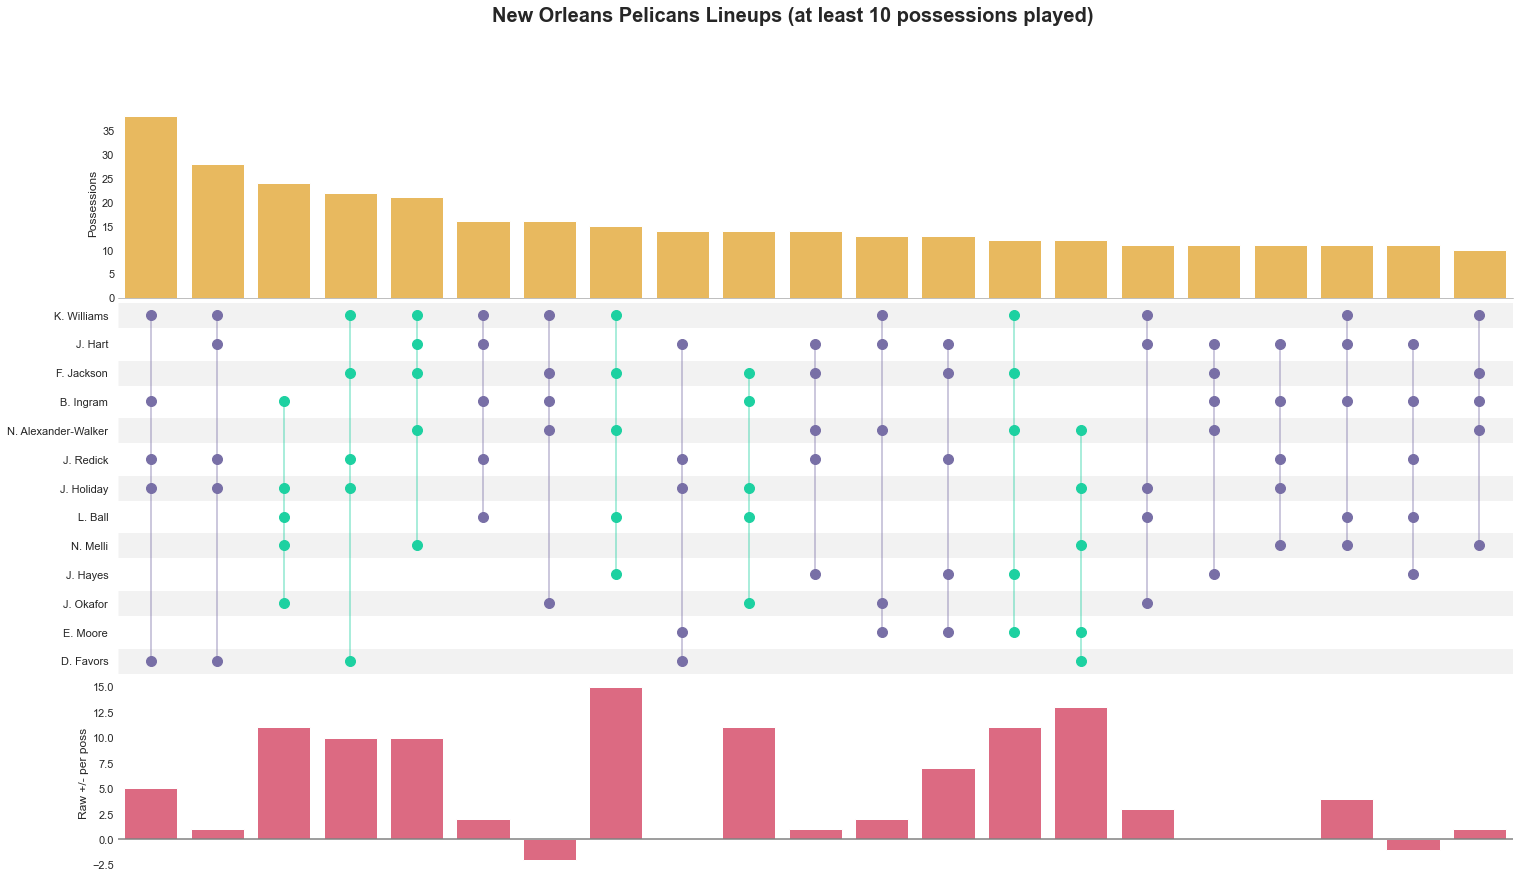

In [13]:
# Initialize figure
fig = plt.figure(figsize=(25, 14))

# Let's call upon Gridspec again... we're gonna have a primary overlapping sets plot 
# and two marginal barplots that will give details about each lineup
gs = plt.GridSpec(4, 4)
ax = plt.subplot(gs[1:3, :])
ax2 = plt.subplot(gs[0, :])
ax3 = plt.subplot(gs[3, :])

# Removes any excess space between each subplot
plt.subplots_adjust(wspace=0, hspace=0)

# We're going to paint a background of alternating light gray bars to highlight each players' rows
# Depending on the size of your plot and dataset, you may need to tinker with this to get the bars just right
ax.hlines(y=range(0, len(names), 2), xmin=-0.5, xmax=len(lineup_df_all)-0.5,
          color='gray', alpha=0.1, linewidth=25, zorder=2)

# Now time to plot the nodes! We'll use a technique similar to the dumbbell plot, except vertical this time
# Let's iterate through the coordinates for each lineup...
for m in nodes_arr:
    # If the lineup has done better than a +10, we want to highlight it with a bright green color
    if lineup_df_all.loc[m[0][-1]]['PlusMinus'] >= 10:
        color = '#1dd1a1'
    # Otherwise, the sets will show up in purple
    else:
        color = '#786fa6'
    
    # Draw vertical lines across the first and last node in each lineup
    ax.vlines(x=m[0][-1], ymin=m[0][0], ymax=m[-1][0], color=color, alpha=0.5, linewidth=1.5, zorder=3)
    
    # Now with the bars in place, draw the dots for each player in the lineup using the indices
    for n in m:
        ax.scatter(n[1], n[0], color=color, s=100, zorder=4)

# Stylistic adjustments to turn off all the spines in our main plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Turn off all ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticks([])

# This will fix the alignment for our plot so that all the "dumbbells" are centered and spread out appropriately
ax.set_xlim(-0.5, len(lineup_df_all)-0.5)

# On the y-axis, set the labels to be each player's name
ax.set_yticks(range(len(names)))
ax.set_yticklabels(list(names))

# Now in the marginal axes, create barplots showing the possessions played by each lineup as well as the plus-minus
sns.barplot(x=lineup_df_all.index, y="Possessions", data=lineup_df_all, errwidth=0, color='#ffc048', ax=ax2)
sns.barplot(x=lineup_df_all.index, y="PlusMinus", data=lineup_df_all, errwidth=0, color='#ef5777', ax=ax3)

# Since there are values on both sides of zero, let's draw a "floor" line across zero
ax3.axhline(0, linestyle='-', color='grey', zorder=6)

# Turn off the ticks on both bar plots and set y-axis labels correspondingly
ax2.tick_params(axis=u'both', which=u'both', length=0)
ax2.set_xticks([])
ax2.set_ylabel('Possessions')

ax3.tick_params(axis=u'both', which=u'both', length=0)
ax3.set_xticks([])
ax3.set_ylabel('Raw +/- per poss')

# Turn off all spines on each barplot except those neighboring the main combinations plot
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('gray')
ax2.spines['bottom'].set_linewidth(0.5)

ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['top'].set_color('gray')
ax3.spines['top'].set_linewidth(0.5)

# Finally, let's see the result!
plt.suptitle('New Orleans Pelicans Lineups (at least 10 possessions played)', fontsize=20, fontweight='heavy')
plt.show()